## Point estimate

In [1]:
from scipy import stats
import numpy as np

stats.chi2.stats(df=55, moments="mvsk")


(array(55.), array(110.), array(0.38138504), array(0.21818182))

In [2]:
x = stats.chi2.rvs(size=10000, df=55)

print(np.mean(x))
print(np.var(x))
print(stats.skew(x))
print(stats.kurtosis(x))


55.01436221320804
111.43161070997435
0.37594125412717866
0.19748196511005833


## Skewness / Kurtosis

Skewness 0.5163977794943222


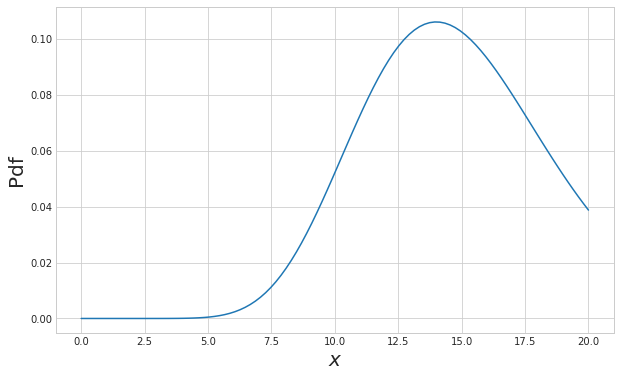

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

a = 15

x = np.linspace(0, 20, 100)
gamma_pdf = stats.gamma.pdf(x, a=a)

plt.figure(figsize=(10, 6))
plt.plot(x, gamma_pdf)
plt.xlabel(r"$x$", fontsize=20)
plt.ylabel("Pdf", fontsize=20)
print("Skewness", stats.gamma.stats(a=a, moments="s"));

Kurtosis student t 0.006024096385542169
Kurtosis Normal 0.0


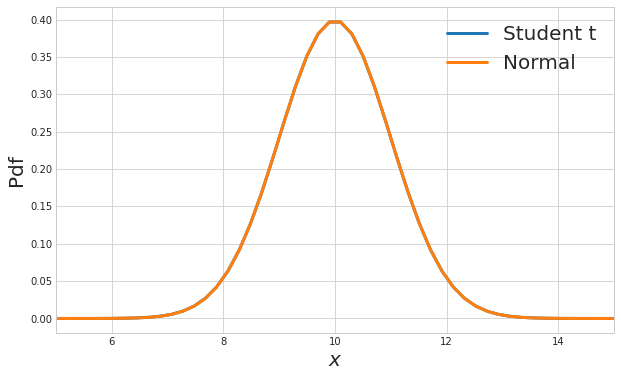

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt

df = 1000

x = np.linspace(0, 20, 100)
student_t_pdf = stats.t.pdf(x, df=df, loc=10)

plt.figure(figsize=(10, 6))
plt.plot(x, student_t_pdf, lw=3, label="Student t")
plt.plot(x, stats.norm.pdf(x, loc=10), lw=3, label="Normal")
plt.xlabel(r"$x$", fontsize=20)
plt.ylabel("Pdf", fontsize=20)
plt.xlim(5, 15)
plt.legend(fontsize=20);
print("Kurtosis student t", stats.t.stats(df=df, loc=10, moments="k"))
print("Kurtosis Normal", stats.norm.stats(loc=10, moments="k"))

## Quantiles / Percentiles

In [5]:
import numpy as np

x = stats.norm.rvs(size=10000)


In [6]:
np.percentile(x, q=[2.5, 50, 97.5])


array([-1.99041067, -0.00846407,  2.00379354])

In [28]:
import pandas as pd

df = pd.DataFrame({"rnv": x})
df["rnv_cut"], bins = pd.qcut(df["rnv"], 10, retbins=True)
df["rnv_cut_2"] = pd.cut(df["rnv"], bins)
(df["rnv_cut"].value_counts()).to_frame("counts")


,counts
"(0.00355, 6.207]",1000
"(6.207, 12.321]",1000
"(12.321, 18.684]",1000
"(18.684, 24.661]",1000
"(24.661, 31.041]",1000
"(31.041, 37.465]",1000
"(37.465, 43.92]",1000
"(43.92, 50.504]",1000
"(50.504, 56.729]",1000
"(56.729, 62.826]",1000


## Dependency

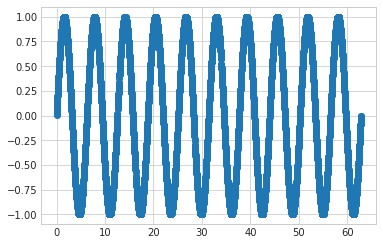

In [27]:
%matplotlib inline
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

x = np.random.uniform(0, 20*np.pi, size=10000)
y = np.sin(x)
plt.scatter(x, y);

In [29]:
stats.pearsonr(x, y)


(-0.06876346560995958, 5.834406600309107e-12)

In [30]:
stats.spearmanr(x, y)


SpearmanrResult(correlation=-0.06625855683858557, pvalue=3.304599326470029e-11)

In [31]:
x


array([ 8.18773114, 16.07071878, 46.53550622, ..., 54.31027514,
       25.7447195 , 41.09396008])

In [34]:
metrics.normalized_mutual_info_score(np.rint(x), np.rint(y))


0.29441371608217176

### Danger with Pearson

In [35]:
df = pd.DataFrame(
    {"col1": stats.norm.rvs(size=100000), "col2": stats.norm.rvs(size=100000)}
)
df


,col1,col2
0,0.750941,-0.204835
1,0.013396,1.484935
2,0.202927,-1.254899
3,-0.304688,0.140917
4,0.284851,1.597122
...,...,...
99995,-0.550413,-0.399237
99996,0.429372,-0.394720
99997,0.391708,-1.513547
99998,-2.952584,-0.694594


In [36]:
df.rank()


,col1,col2
0,77544.0,41648.0
1,50563.0,93007.0
2,58158.0,10340.0
3,38132.0,55368.0
4,61387.0,94377.0
...,...,...
99995,29233.0,34391.0
99996,66705.0,34576.0
99997,65388.0,6569.0
99998,128.0,24146.0


In [37]:
df.corr("spearman")


,col1,col2
col1,1.000000,-0.000963
col2,-0.000963,1.000000


In [38]:
df.corr("pearson")


,col1,col2
col1,1.000000,-0.000582
col2,-0.000582,1.000000


In [39]:
df.iloc[np.random.choice(range(df.shape[0]))] = 9999999
df


,col1,col2
0,0.750941,-0.204835
1,0.013396,1.484935
2,0.202927,-1.254899
3,-0.304688,0.140917
4,0.284851,1.597122
...,...,...
99995,-0.550413,-0.399237
99996,0.429372,-0.394720
99997,0.391708,-1.513547
99998,-2.952584,-0.694594


In [40]:
df.corr("pearson")


,col1,col2
col1,1.0,1.0
col2,1.0,1.0


In [41]:
df.corr("spearman")


,col1,col2
col1,1.000000,-0.000935
col2,-0.000935,1.000000


## Entropy

In [42]:
from sklearn.metrics.cluster import entropy

x = np.random.normal(size=100000)


entropy(x)


11.512925464970223

In [44]:
def ent(data):
    _, counts = np.unique(data, return_counts=True)
    p_data = counts / len(data)  # calculates the probabilities
    return stats.entropy(p_data)  # input probabilities to get the entropy


ent(x)


11.512925464970223

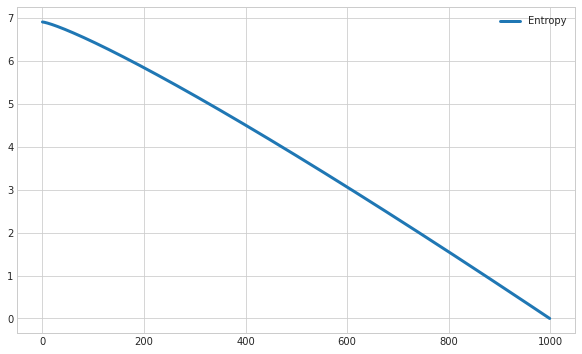

In [45]:
x = np.random.normal(size=1000)
entropy_df = pd.DataFrame(index=range(len(x)), columns=["Entropy"])

for i in range(len(x)):
    x[i] = 0
    entropy_df.loc[i, "Entropy"] = entropy(x)

entropy_df.plot(figsize=(10, 6), lw=3)
